# Lab 9: Converter Transfer Function

#### Andrew Phillips

### Prelab: Bode Plot Practice

For this prelab, I analyzed several bode plots to determine their DC gain, poles, and zeros.

Plot A:

This plot has a DC gain of 0, and no poles or zeros, as the gain remains at unity for all shown frequencies.

Plot B:

This plot has a DC gain of -6dB, and no poles or zeros, as the gain remains at -6dB for all shown frequencies.

Plot C:

We can see that the plot has a gain roll-off of -20dB/dec and the phase shift is -90 degrees, indicating the system has a pole at 0. With a pole at 0, the system has infinite gain at DC.

Plot D:

This plot has a gain roll-off of -20dB/dec starting at a corner frequency of 110Hz and a phase shift of -90 degrees centered at 200Hz, indicating a pole there. The gain is unity before this pole, so the system has a DC gain of 0.

Plot E:

The plot has gain slope of 20dB/dec starting at a corner frequency of 130Hz and a phase shift of 90 degrees centered at 400Hz, indicating a zero there. The gain is unity before this zero, so the system has a DC gain of 0.

Plot F:

The plot has a gain roll-off of -40dB/dec and a phase shift of -90 centered at 120Hz, indicating that the system has 2 poles at 300Hz. The gain is unity before these poles. so the system has a DC gain of 0.

Plot G:

It looks like this circuit has 2 poles, one at 20 Hz and another at 4000Hz, as indicated by the 2 phase shifts visible in the bode plot. The gain at the bode plot seems to be approaching 0, so the system seems to have a DC gain of 0.

Plot H:

This circuit looks like a second order low pass filter with 2 poles at 400Hz, as depicted by the phase shift of -180 degrees centered around 400Hz. This bode plot also seems to have a damping ratio below 1, indicated by the peaking behavior of the gain plot. The gain is constant at -138 before this, so the DC gain of the circuit is -138.

This page gives an overview of the peaking behavior caused by the damping ratio: https://www.electronics-tutorials.ws/filter/second-order-filters.html 

Plot I:

This plot has 2 poles at 400Hz, as indicated by the -180 degree phase shift centered around 400Hz and -40dB/dec rolloff. The gain does not change before these poles, so the DC gain is -135.

Plot J:

This plot seems to have a pole at 300Hz and a zero at 400Hz, indicated by the 3dB corner frequencies for both magnitude behavior changes. The DC gain appears to be 0.

Plot K:

This plot has a zero at 300Hz and a pole at 400Hz, indicated by the 3dB corner frequencies for both magnitude behavior changes. The DC gain appears to be 0.


## Data Collection

In this lab, we measured the control-to-output transfer function of our lab hardware configured for DCM operation. In this lab, we utilized an Analog Discovery 2 to inject Vcomp signals into our lab hardware. We first injected signals at several voltage levels to establish a relationship between Vcomp and the output voltage. We then took bode plots at output voltage levels of 4V, 7V, and 10V. Each of these output levels represents a different "small-signal," which will result in a different transfer function to analyze from the respective bode plot.

The measurements from the DC bias measurements are plotted below:

In [2]:
import csv
import pandas as pd

# read funky Rigol CSV format
def read_rigol_csv(csv_file_name):
    with open(csv_file_name) as f:
        rows = list(csv.reader(f))
        i = 0
        while rows[0][i] != "":
            i = i+1
        numcols = i-2
        t0 = float(rows[1][numcols])
        dT = float(rows[1][numcols+1])
    data = pd.read_csv(csv_file_name, usecols=range(0,numcols), skiprows=[1])
    data['X'] = t0+data['X']*dT
    return data, t0, dT

[ 6.50181818 -7.33818182]
[ 7.92272727 -9.09181818]


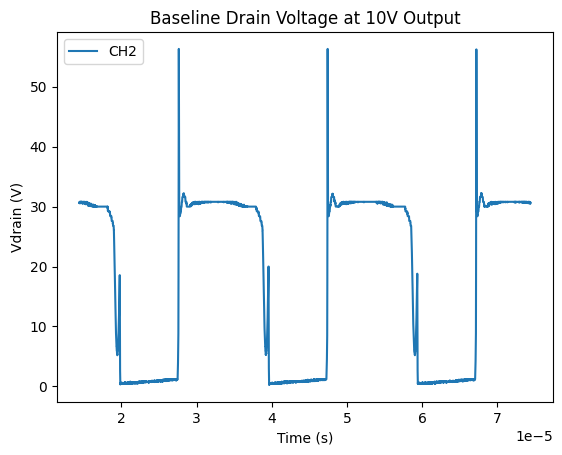

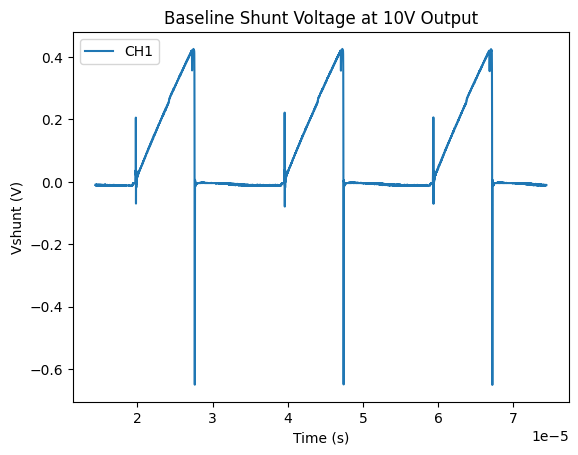

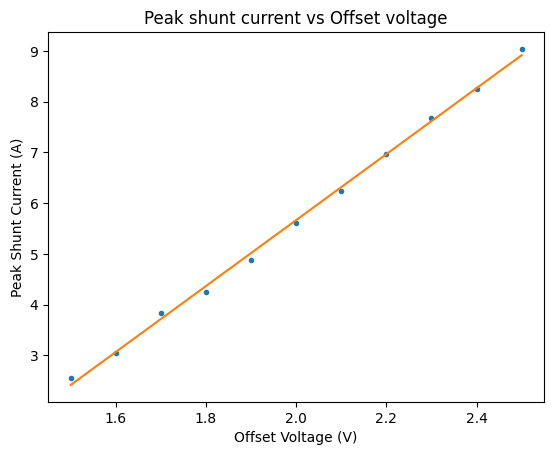

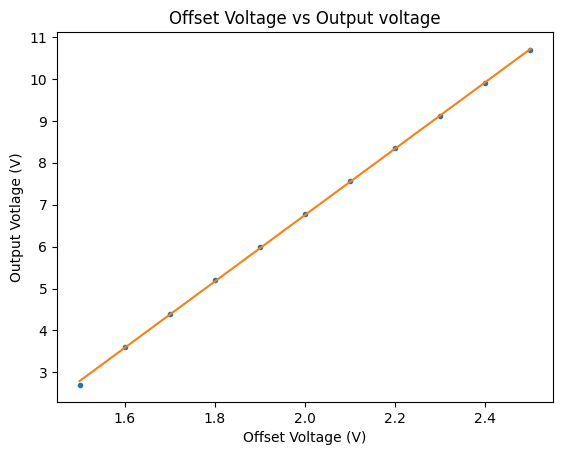

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Vin = [1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5] # V
Vout = [2.7,3.6,4.4,5.2,6,6.78,7.56,8.34,9.12,9.9,10.69] # V
Vsh_pk = [0.128,0.152,0.192,0.212,0.244,0.28,0.312,0.348,0.384,0.412,0.452] # V
Rshunt = 0.05 # Ohms

Ipk = [x/Rshunt for x in Vsh_pk]

# plot baseline measurements
[baseline_data, baseline_data_t0, baseline_data_dT] = read_rigol_csv('data/baseline.csv')

# apply data filter
baseline_data['CH1'] = baseline_data['CH1'].rolling(10).mean()
baseline_data['CH2'] = baseline_data['CH2'].rolling(10).mean()

# plot drain voltage
fig, ax = plt.subplots()
baseline_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Baseline Drain Voltage at 10V Output")

# plot shunt voltage
fig, ax = plt.subplots()
baseline_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vshunt (V)")
ax.set_title("Baseline Shunt Voltage at 10V Output")

# plot Ipk = f(offset)
plt.figure()
plt.plot(Vin,Ipk,'.')
plt.title("Peak shunt current vs Offset voltage")
plt.xlabel("Offset Voltage (V)")
plt.ylabel("Peak Shunt Current (A)")
# fit line
plt.plot(np.unique(Vin), np.poly1d(np.polyfit(Vin, Ipk, 1))(np.unique(Vin)))
print(np.polyfit(Vin, Ipk, 1))

# plot V = f(offset) (output voltage)
plt.figure()
plt.plot(Vin,Vout,'.')
plt.title("Offset Voltage vs Output voltage")
plt.xlabel("Offset Voltage (V)")
plt.ylabel("Output Votlage (V)")
# fit line
plt.plot(np.unique(Vin), np.poly1d(np.polyfit(Vin, Vout, 1))(np.unique(Vin)))
print(np.polyfit(Vin, Vout, 1))

## Post Lab Analysis

1. Baseline Vsh and Vdrain waveforms are plotted above.

2. The LED is flickering during the sweep as a sinusoidal waveform is being injected into the COMP pin and frequencies ranging from 10Hz to 50kHz. As a consistent DC voltage is not being supplied to the COMP pin, the peak current setting is continuously changing during the sweep, resulting in the output voltage continuously changing. Because the red LED is powered by the output voltage, the LED ends up flickering.

3. From the plot above, we can fit a straight line and derive an expression of Ipk = 6.502*Voffset-7.34.

4. The "offset" voltage corresponds to the voltage injected by the AD2 into J5. With the jumper JP4 set in the 1-2 position, the injected voltage is now replacing the previously manually tunned Vcomp value being fed into the UC288's COMP pin. Because of this, the injected offset voltage directly correlates with a desired Ipk value. My expression matches what I predict, a linear relationship between Voffset and Ipk.

5. Looking at the schematic, it makes sense where the AD2 flywires are connected to take a bode plot. Channel 1 of the AD2 corresponds with the input Vcomp value, which is directly proportional to a corresponding Ipk value (the input to our transfer function). Channel 2, on the other hand, monitors the output voltage of our circuit. With these two leads, the AD2 can control the input and measure the output to develop a bode plot of the overall circuit. I also found the zener diode network at J5 interesting, maintaining a voltage between GND and 5V.

6. From the plot above, we can fit a straight line and derive an expression of Vout = 7.922*Voffset-9.09.

7. Using the equations from lesson 8, we can derive an expression for Vout in terms of Ipk using a similar derivation process to what I derived in Lab 2 (this time for the buck-boost converter, adding in the flyback conversion term):

![ipkvout](images/ipk_vout_eq.jpg)

Using the equation we just derived for Voffset vs Ipk, we substitute Voffset for Ipk to define an equation for Voffset vs Vout. This is substituted below:

![voffsetvout](images/voffset_vout.jpg)

In the format Voffset = m*Vout + b, I calculated m = 0.10 and b = 1.30 in the code block below, which is similar to the line fit values of m = 0.12 and b = 1.128, so my measurements match what the model predicts.



In [38]:
Vo = 10 #V
Vg = 18 #V
a = 0.816 #calculated in lab 6
V = Vo/a #V
alpha = 0.8
Ro = 5 # Ohms
R = a**2*Ro
M = a*Vo/Vg
L = 18e-6 # Henrys
fs = 50e3
Ts = 1/fs

k = np.sqrt((L*Ro)/(2*Ts))
term1 = 1/(k*6.66)
term2 = 8.667/6.66

print(term1)
print(term2)


0.10010010010010009
1.3013513513513513
1.5


8. Based on these terms, it makes sense that the output voltage is directly proportional to the offset voltage, as the offset voltage is directly proportional to Ipk. We can see that many of the other parameters in the circuit also affect this relationship, including the turns ratio of the transformer and the output load resistance.

9. The Bode plots are plotted in one graph below:

Text(0.5, 0, 'Frequency (Hz)')

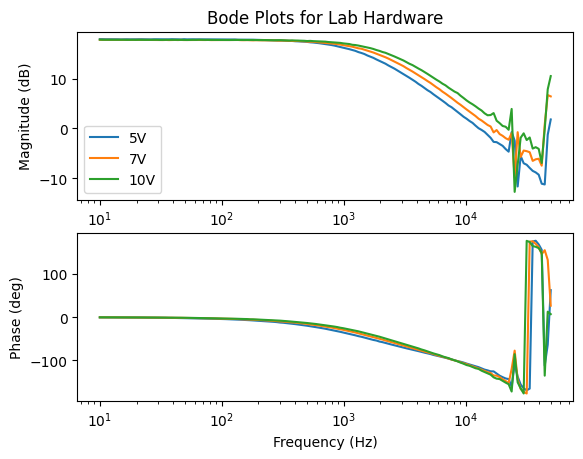

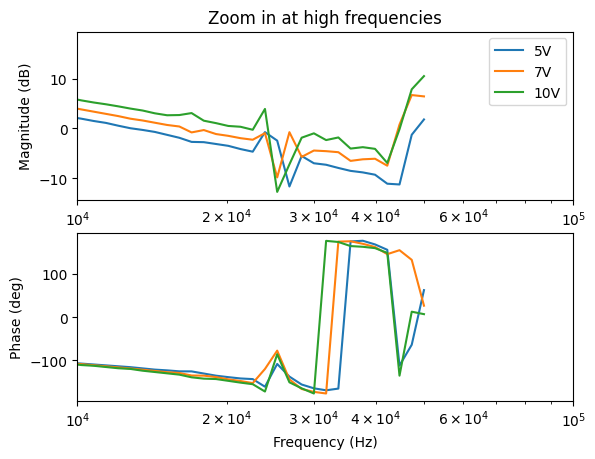

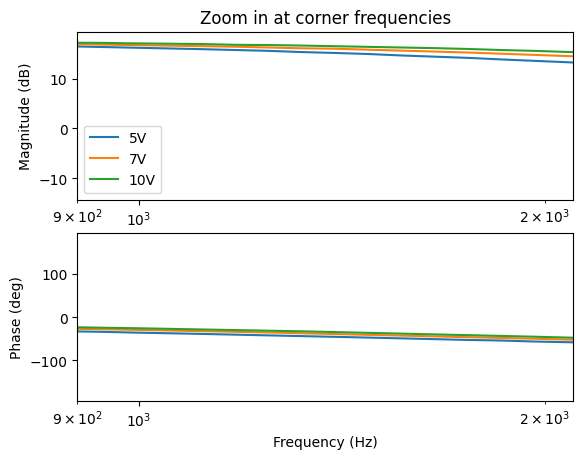

In [34]:
# import data
output_5V = pd.read_csv('data/5V_output.csv')
output_7V = pd.read_csv('data/7V_output.csv')
output_10V = pd.read_csv('data/10V_output.csv')

# plot bode plots
figure, ax = plt.subplots(2,1)
# plot magnitudes
ax[0].plot(output_5V['Frequency (Hz)'],output_5V['Channel 2 Magnitude (dB)'])
ax[0].plot(output_7V['Frequency (Hz)'],output_7V['Channel 2 Magnitude (dB)'])
ax[0].plot(output_10V['Frequency (Hz)'],output_10V['Channel 2 Magnitude (dB)'])
ax[0].set_xscale('log')
# plot phase shifts
ax[1].plot(output_5V['Frequency (Hz)'],output_5V['Channel 2 Phase (deg)'])
ax[1].plot(output_7V['Frequency (Hz)'],output_7V['Channel 2 Phase (deg)'])
ax[1].plot(output_10V['Frequency (Hz)'],output_10V['Channel 2 Phase (deg)'])
ax[1].set_xscale('log')
# set labels
ax[0].set_title("Bode Plots for Lab Hardware")
ax[0].legend(['5V','7V','10V'])
ax[0].set_ylabel("Magnitude (dB)")
ax[1].set_ylabel("Phase (deg)")
ax[1].set_xlabel("Frequency (Hz)")

# plot zoom in at high frequencies
figure, ax = plt.subplots(2,1)
# plot magnitudes
ax[0].plot(output_5V['Frequency (Hz)'],output_5V['Channel 2 Magnitude (dB)'])
ax[0].plot(output_7V['Frequency (Hz)'],output_7V['Channel 2 Magnitude (dB)'])
ax[0].plot(output_10V['Frequency (Hz)'],output_10V['Channel 2 Magnitude (dB)'])
ax[0].set_xscale('log')
ax[0].set_xlim([10e3,10e4])
# plot phase shifts
ax[1].plot(output_5V['Frequency (Hz)'],output_5V['Channel 2 Phase (deg)'])
ax[1].plot(output_7V['Frequency (Hz)'],output_7V['Channel 2 Phase (deg)'])
ax[1].plot(output_10V['Frequency (Hz)'],output_10V['Channel 2 Phase (deg)'])
ax[1].set_xscale('log')
ax[1].set_xlim([10e3,10e4])
# set labels
ax[0].set_title("Zoom in at high frequencies")
ax[0].legend(['5V','7V','10V'])
ax[0].set_ylabel("Magnitude (dB)")
ax[1].set_ylabel("Phase (deg)")
ax[1].set_xlabel("Frequency (Hz)")

# plot zoom in at corner frequencies
figure, ax = plt.subplots(2,1)
# plot magnitudes
ax[0].plot(output_5V['Frequency (Hz)'],output_5V['Channel 2 Magnitude (dB)'])
ax[0].plot(output_7V['Frequency (Hz)'],output_7V['Channel 2 Magnitude (dB)'])
ax[0].plot(output_10V['Frequency (Hz)'],output_10V['Channel 2 Magnitude (dB)'])
ax[0].set_xscale('log')
ax[0].set_xlim([90e1,21e2])
# plot phase shifts
ax[1].plot(output_5V['Frequency (Hz)'],output_5V['Channel 2 Phase (deg)'])
ax[1].plot(output_7V['Frequency (Hz)'],output_7V['Channel 2 Phase (deg)'])
ax[1].plot(output_10V['Frequency (Hz)'],output_10V['Channel 2 Phase (deg)'])
ax[1].set_xscale('log')
ax[1].set_xlim([90e1,21e2])
# set labels
ax[0].set_title("Zoom in at corner frequencies")
ax[0].legend(['5V','7V','10V'])
ax[0].set_ylabel("Magnitude (dB)")
ax[1].set_ylabel("Phase (deg)")
ax[1].set_xlabel("Frequency (Hz)")

10. Overall, all the bode plots share a relatively similar behavior. However, by zooming in at the corner frequencies and high frequencies, we can see that that a higher output voltage results in poles that are slightly higher frequencies. In addition, we can see the behavior at high frequencies in the phase plot is shifted to slightly lower frequencies at higher output voltages.

11. The DC gain of the circuit appears to be 17.9 dB (linear value 7.94), as there do not appear to be any poles or zeroes before 10e3 Hz (making a first order approximation of the system by ignoring the inductor). Based on our circuit parameters, I would expect to see a gain much lower at DC, of 1.5.

12. One simple transfer function from the plots is modelling a single pole at 1.5 kHz. This would result in a transfer function of H(s) = (7.94)*1/(s/1.5e3+1).

13. One pole present in the bode plot is at 1.5 kHz. This is low pass filter behavior is a result of the output capacitance and load.

14. There are likely other poles or zeroes in the control to output transfer function, likely at the higher frequencies closer to 50 kHz. The data gathered for the bode plot is much more noisy here, but there is similar behavior across all 3 output voltage levels (especially on the phase plot), pointing towards there being a pole or zero in the data.

15. Overall I am somewhat surprised by how similar the bode plots are, but on further reflection the "small-signals" are not that far away from each other, so it makes sense that a lot of the behavior is similar. It is interesting to see the low-pass filter effect so prominently on the plots from the output load and capacitance. The article I linked below helped me understand a lot of the behavior occuring in this bode plot using a buck as an example switching converter. The phase margins in our bode plot are well above 0 at the crossover frequency, indicating a stable system. However, one question I still have is regarding the crossover frequency. The crossover frequency appears to be above 1/10th of the switching frequency. Based on the article, I believe this should result in potentially unstable behavior, but our flyback is able to maintain a consistent output voltage at all levels. I would like to investigate this further in future labs.

https://www.analog.com/en/resources/technical-articles/power-supply-design-how-bode-plots-can-help.html